In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Shéma du programme de machine learning

![schema](formula_png/schema.png "schema")

## Génération des données pour une classification binaire

dimensions de X: (100, 2)
dimensions de y: (100, 1)


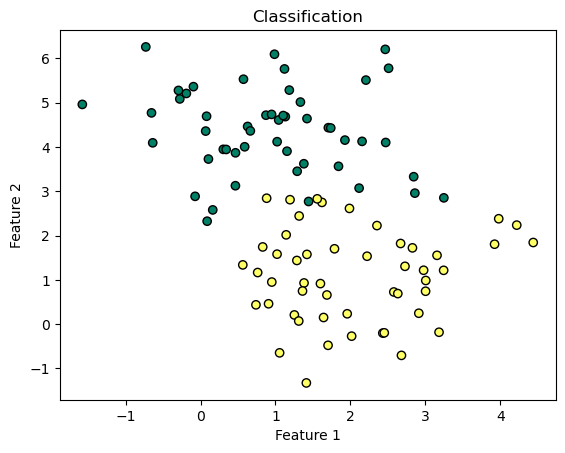

In [2]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2,random_state=0)

# Reshape y en (200, 1) au lieu de (200,) qui est généré par défault
y = y.reshape(y.shape[0], 1)

print("dimensions de X:", X.shape)
print("dimensions de y:", y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer", edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Classification")
plt.show()


## Fonction d’initialization
![initialisation](formula_png/initialisation.png "initialisation")

In [3]:
def initialisation(X):
    # W est généré aléatoirement et sa matrice est ajusté au nombre de features X
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

## Fonction du modèle
![model](formula_png/model.png "model")

In [4]:
def model(X, W, b):
    # Initialisation de Z qui est notre "fonction du perceptron" de la forme w1x1 + w2x2 + b 
    Z = X @ W + b
    # Fonction d’activation, on utilise Sigmoïde qui calcul la vraissemblance à partir de Z (retourne des probabilités de vraissemblance)
    A = 1 / (1 + np.exp(-Z))
    return A

## Fonction cout (Log Loss)
![log_loss](formula_png/log_loss.png "log_loss")

In [5]:
# Log Loss est la fonction coût qui retourne un nombre réel avec un certaine marge d’erreure qui nous servira pour la descente de gradient
def log_loss(A, y):
    # len(y) pour s’adapter au nombre de points, on veut faire une moyenne, ici y = 100
    return 1 / len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

## Fonction des gradients
![Gradients](formula_png/gradients.png "Gradients")

In [6]:
def gradients(A, X, y):
    # Le Jacobien
    dW = 1 / len(y) * np.dot(X.T, A - y)
    # Retourne un nombre réel
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)


## Fonction de mise à jour pour la descente de gradient
![Descente de Gradients](formula_png/descente_gradients.png "Descente de Gradients")

In [7]:
# Descente de gradients
def update(dW, db, W, b, learning_rate): 
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return(W, b)

## Fonction de prédiction

In [8]:
# Cette fonction sert à vérifier la toxicité de la plante sur notre model entrainé
def predict(X, W, b):
    # Calculer les activations, donc, les sorties du model au dessus de 0.5 (fonction d’activation Sigmoïde a(z) qui retourne une probabilité)
    A = model(X, W, b)
    # Probabilité de toxicité
    # print(A)
    # Cela retourne les valeurs de la classe 1 (toxiques)
    return A >= 0.5


## Fonction de performance (Accuracy)

In [9]:
from sklearn.metrics import accuracy_score


## Rassemblage

In [10]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    # Initialiser W et b
    W, b = initialisation(X)

    Loss = []

    for _ in range(n_iter):
        A = model(X, W, b)
        # Appeler la fonction coût tout en la gardant dans une liste pour suivre l’évolution
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    # Sur ces données d’entrainement, elle arrive à prédire une bonne réponse x pourcent du temps
    print("Accuracy : ", accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return(W, b)

    

Accuracy :  0.89


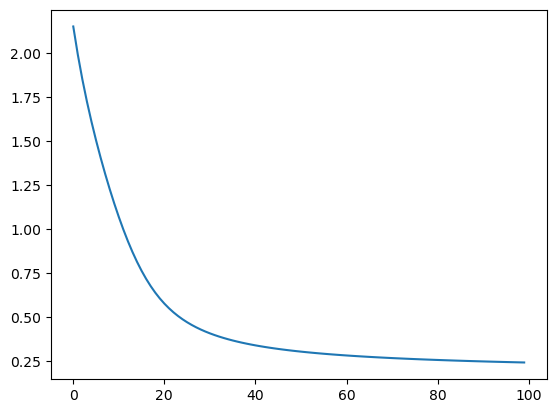

In [11]:
W, b = artificial_neuron(X, y)

Petit rappel pour tracer la droite de la frontière de décision 
![frontiere_decision](formula_png/frontiere_decision.png "frontiere_decision")

Essayons maintenant d’ajouter une nouvelle plante pour prédire si elle est toxique ou non

C:\Users\agobbe\AppData\Local\Temp\ipykernel_32492\1943491804.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(new_plant[0], new_plant[1], c='r', cmap="summer")


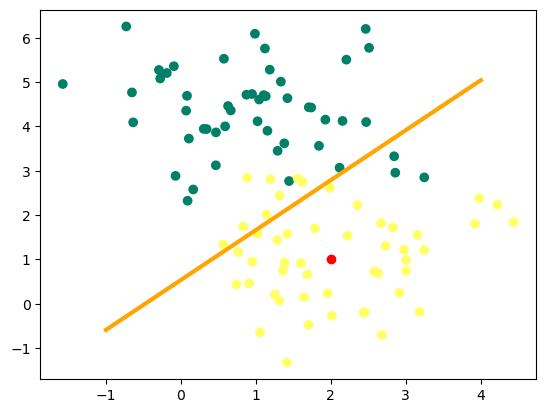

Prediction Sucessfull


In [12]:
new_plant = np.array([2, 1])

# Crée une liste allant de -1 à 4 de 100 points, régulièrement espacés, cela formera une base de valeur pour l’appliqué à l’équation de la frontière de décision (w1x1+b = 0)
x0 = np.linspace(-1, 4, 100)
# Pour trouver ou cette équation est juste (w1x1+b = 0), il faut réaranger l’équation
# On isole alors x2 pour trouver les valeurs de l’équation qui permettent d’annuler cette fonction
x1 = ( -W[0] * x0 - b ) / W[1]
# En insérant les les x1 dans l’équation de x2, on trouve les coordonnées qui assurent que la droite forme la frontière de décsion.
plt.plot(x0, x1, c='orange', lw=3)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer")
plt.scatter(new_plant[0], new_plant[1], c='r', cmap="summer")
plt.show()

# Predict retourne un true or false
if predict(new_plant, W, b) == True:
    print("Prediction Sucessfull")
else :
    print("Prediction Failed")
